## **BUSINESS UNDERSTANDING**
This project analyzes movie performance data to uncover the key factors that drive box office success and audience ratings. By examining variables such as genre, budget, runtime, ratings, and contributor roles (directors and writers), it aims to help studios make data-driven decisions in budgeting, hiring, and marketing. The goal is to identify high-impact talent, understand how production choices affect profitability, and provide actionable insights to improve investment, content, and strategic planning in the film industry.

## **SECTION 1: DATA UNDERSTANDING**
The datasets used in this project are sourced from publicly available movie databases, including Box Office Mojo (BOM), The Numbers (TN), IMDB database and The Movie Database (TMDb).They provide structured information on thousands of films released over the past two decades.
The data spans multiple formats; categorical variables such as genre, director, and writer, numerical variables such as budget, gross revenue, and ratings and temporal variables such as release year and runtime.
The dataset includes:
- Film titles & release dates
- Genres (one or multiple per film)
- Production budget & box office revenue
- Ratings & popularity metrics
- Contributor data (directors,writers etc.)
- Movie runtime


In [1]:
# imports
import pandas as pd # cleaning data
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import numpy as np # python calculations
import json # parse data
import warnings # ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import all required datasets
length_data = pd.read_csv("Data/rt.movie_info.tsv", sep='\t')
ratings_data = pd.read_csv("Data/tmdb.movies.csv")
merged_movie_info = pd.read_csv("Data/merged_movie_info.csv",index_col=[0])
df = pd.read_csv('Data/clean_full_movie_data.csv')

In [3]:
# check the first rows of dataset
length_data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
# check first rwos of dataset
ratings_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# check dataset information
length_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
# check dataset information
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
# look at the first five rows
merged_movie_info.head()

,title,studio,year,production_budget,worldwide_gross,popularity,vote_average,vote_count,profit,genre,director,writer
1,Inception,WB,2010,160000000,835524642,27.920,8.3,22186,675524642,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,155000000,418186950,17.382,6.3,3196,263186950,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
30,Gulliver's Travels,Fox,2010,112000000,232017848,10.768,5.1,1282,120017848,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...
34,Due Date,WB,2010,65000000,211739043,12.445,6.3,2973,146739043,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland
36,Yogi Bear,WB,2010,80000000,204774690,9.096,5.3,387,124774690,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland


In [8]:
# checkout dataset information
merged_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 1 to 2470
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              282 non-null    object 
 1   studio             282 non-null    object 
 2   year               282 non-null    int64  
 3   production_budget  282 non-null    int64  
 4   worldwide_gross    282 non-null    int64  
 5   popularity         282 non-null    float64
 6   vote_average       282 non-null    float64
 7   vote_count         282 non-null    int64  
 8   profit             282 non-null    int64  
 9   genre              282 non-null    object 
 10  director           282 non-null    object 
 11  writer             282 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 28.6+ KB


In [9]:
# check the first rows
df.head()

,movie_titles,genres,original_language,release_date,studio,production_budget,domestic_gross,foreign_gross,worldwide_gross,revenue,runtime,popularity,production_companies,production_countries,vote_average,vote_count
0,toy story 3,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,2010-06-16,BV,200000000,"$415,004,880",652000000,"$1,068,879,522",1066969703,103.0,16.966470,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",7.6,4710.0
1,inception,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,2010-07-14,WB,160000000,"$292,576,195",535700000,"$835,524,642",825532764,148.0,29.108149,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",8.1,14075.0
2,shrek forever after,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",en,2010-05-16,P/DW,165000000,"$238,736,787",513900000,"$756,244,673",752600867,93.0,11.803808,"[{'name': 'DreamWorks Animation', 'id': 521}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.0,2021.0
3,the twilight saga: eclipse,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,2010-06-23,Sum.,68000000,"$300,531,751",398000000,"$706,102,828",698491347,124.0,34.047399,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",5.9,2382.0
4,iron man 2,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,2010-04-28,Par.,200000000,"$312,433,331",311500000,"$621,156,389",623933331,124.0,19.083344,"[{'name': 'Marvel Studios', 'id': 420}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6.6,6969.0


In [10]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45749 entries, 0 to 45748
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_titles          45748 non-null  object 
 1   genres                45603 non-null  object 
 2   original_language     45592 non-null  object 
 3   release_date          45748 non-null  object 
 4   studio                1469 non-null   object 
 5   production_budget     45748 non-null  object 
 6   domestic_gross        1470 non-null   object 
 7   foreign_gross         1274 non-null   object 
 8   worldwide_gross       1470 non-null   object 
 9   revenue               45748 non-null  object 
 10  runtime               45355 non-null  float64
 11  popularity            45603 non-null  float64
 12  production_companies  45603 non-null  object 
 13  production_countries  45603 non-null  object 
 14  vote_average          45603 non-null  float64
 15  vote_count         

## **SECTION 2: DATA PREPARATION**
To ensure reliable analysis, the following steps were performed:
- Merging of the datasets
- Cleaned inconsistent formatting and missing values
- Converted monetary values to numeric types
- Extracted and separated multiple genres per film
- Calculated profit and categorized release dates into seasons

In [11]:
#merging the ratings and length datasets
length_rating_df = pd.merge(
    length_data[["id", "runtime"]],
    ratings_data[["id", "vote_average", "vote_count"]],
    on="id",
    how="inner"
)
length_rating_df.head()

,id,runtime,vote_average,vote_count
0,27,NaN,4.9,170
1,90,96 minutes,7.1,1827
2,93,110 minutes,7.9,359
3,95,116 minutes,6.7,4267
4,189,94 minutes,6.3,2210


In [12]:
# converting the columns to numeric values
length_rating_df["runtime"] = length_rating_df["runtime"].astype(str).str.replace(" minutes", '', regex=False).str.strip()
length_rating_df["runtime"] = pd.to_numeric(length_rating_df["runtime"], errors="coerce")

In [13]:
# check duplicated values
print(length_rating_df.duplicated().value_counts())

False    27
True      5
Name: count, dtype: int64


In [14]:
#drop duplicates 
length_rating_df = length_rating_df.drop_duplicates()
length_rating_df.head()

,id,runtime,vote_average,vote_count
0,27,NaN,4.9,170
1,90,96.0,7.1,1827
2,93,110.0,7.9,359
3,95,116.0,6.7,4267
4,189,94.0,6.3,2210


In [15]:
# check for null values
print(length_rating_df.isnull().sum())

id              0
runtime         1
vote_average    0
vote_count      0
dtype: int64


In [16]:
# drop null values
length_rating_df.dropna(subset=["runtime"], inplace=True)
print(length_rating_df["runtime"].isnull().sum())

0


In [17]:
# filter votes 
vote_limit = 3
filtered_movies_df = length_rating_df[length_rating_df['vote_count'] >=vote_limit].copy()


In [18]:
# categorize the length of movies
movie_length_limits = [0,90,110,140,500]
category_names = ["< 90 min (Short)", "90-110 min (Average)", "110-130 min (Long)", "> 130 min (Epic)"]
filtered_movies_df["runtime_category"] = pd.cut(
    filtered_movies_df["runtime"],
    bins=movie_length_limits,
    labels=category_names,
    right=False
)


In [19]:
# group runtime category and vote_average 
ratings_by_length = filtered_movies_df.groupby("runtime_category", observed=True)["vote_average"].mean().sort_values(ascending=False).reset_index()
ratings_by_length.head()

,runtime_category,vote_average
0,> 130 min (Epic),7.766667
1,< 90 min (Short),7.625000
2,90-110 min (Average),7.466667
3,110-130 min (Long),7.400000


## **SECTION 3: MOVIE RATINGS BY LENGTH OF MOVIES**
This analysis gives a comparison of **movie ratings and the length of the movies**. It shows how the variables runtime and vote_average are related in the dataset. A boxplot was used to show the distribution of votes in relation to runtime. A line graph was also created for the same data

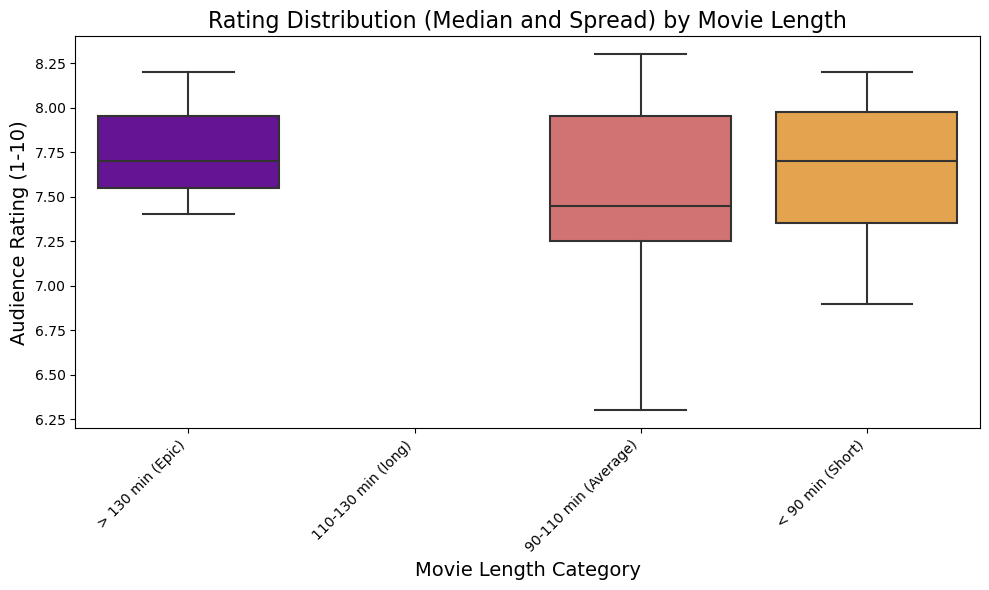

In [20]:
# use boxplot to see distribution of runtime compared to vote_average
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="runtime_category",
    y="vote_average",
    data=filtered_movies_df,
    palette="plasma",
    order=['> 130 min (Epic)', '110-130 min (long)', '90-110 min (Average)', '< 90 min (Short)']
)

plt.title("Rating Distribution (Median and Spread) by Movie Length", fontsize=16)
plt.xlabel("Movie Length Category", fontsize=14)
plt.ylabel("Audience Rating (1-10)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

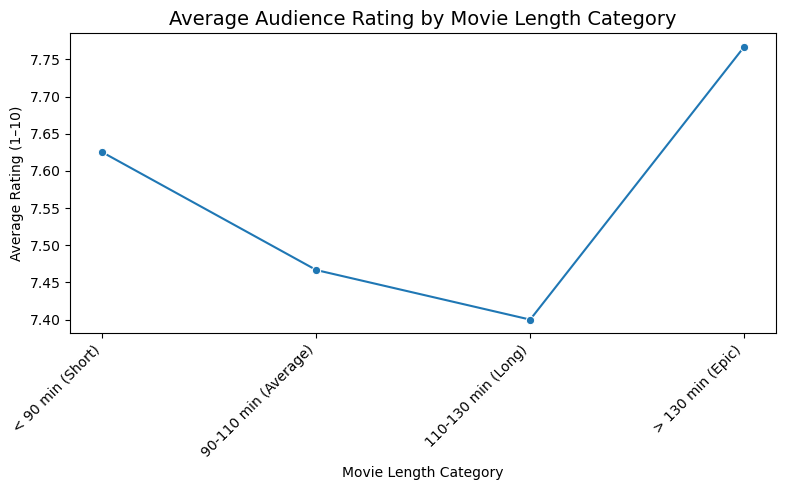

In [21]:
# create plot to check
# average ratings per runtime category
ratings_by_length = (
    filtered_movies_df
    .groupby("runtime_category", observed=True)["vote_average"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=ratings_by_length,
    x="runtime_category",
    y="vote_average",
    marker="o"
)
plt.title("Average Audience Rating by Movie Length Category", fontsize=14)
plt.xlabel("Movie Length Category")
plt.ylabel("Average Rating (1–10)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## **SECTION 4: SUCCESSFULL DIRECTORS AND WRITERS BASED ON MOVIE PROFITS AND RATINGS**
This part is a data preparation and an analysis to identify **directors and writers** who make successful movies based on the profits they bring to their studios and also based on the vote_counts of their movies. It aims to give the new head of the movie studio an idea of the kind of directors and writers to hire.


In [22]:
# Calculate Total Profit per Director
director_total_profit = merged_movie_info.groupby('director')['profit'].sum().sort_values(ascending=False).reset_index()
# Calculate Average Profit per Director
director_avg_profit = merged_movie_info.groupby('director')['profit'].mean().sort_values(ascending=False).reset_index()
director_avg_profit

,director,profit
0,Gary Wheeler,1.684975e+08
1,Clint Eastwood,1.408124e+08
2,Bryan Singer,9.677964e+07
3,George Hickenlooper,9.677964e+07
4,Jim Jarmusch,9.677964e+07
5,Joan Chen,9.677964e+07
6,Peter Webber,9.677964e+07
7,Sam Mendes,9.677964e+07
8,Sylvester Stallone,9.677964e+07
9,John Krasinski,1.552795e+07


In [23]:
# Functions to change the format for the plots so as to be able to us billions and millions instead of the math format
def format_billion(x, pos):
    """Formatter function to display y-axis ticks in billions (B) or millions (M)."""
    if x >= 1e9:
        return f'{x / 1e9:,.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:,.0f}M'
    return f'{x:,.0f}'

def format_million(x, pos):
    """Formatter function to display y-axis ticks in millions (M) or thousands (K)."""
    if x >= 1e9:
        return f'{x / 1e9:,.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:,.0f}M'
    return f'{x:,.0f}'

from matplotlib.ticker import FuncFormatter

# Set up formatter
billion_formatter = FuncFormatter(format_billion)
million_formatter = FuncFormatter(format_million)

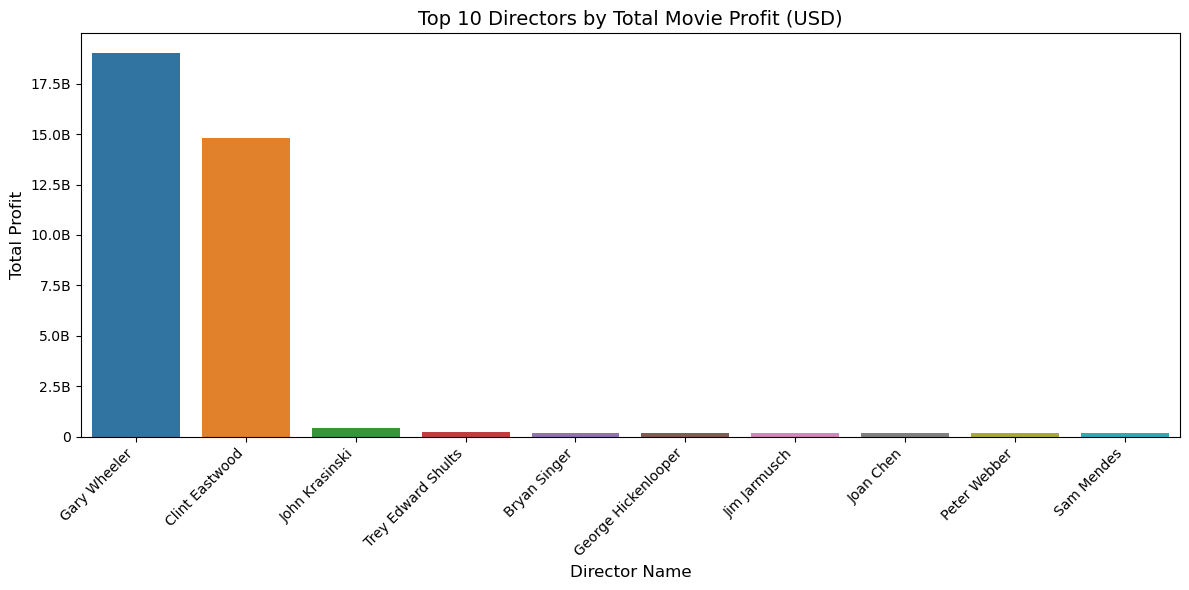

In [24]:
# Top 10 Directors by Total Profit ---
top_10_directors = director_total_profit.head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='director', y='profit', data=top_10_directors)

# Apply formatter for billions/millions

ax.yaxis.set_major_formatter(billion_formatter)

# Labels and formatting
plt.title('Top 10 Directors by Total Movie Profit (USD)', fontsize=14)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate names to prevent overlap
plt.tight_layout()
plt.show()


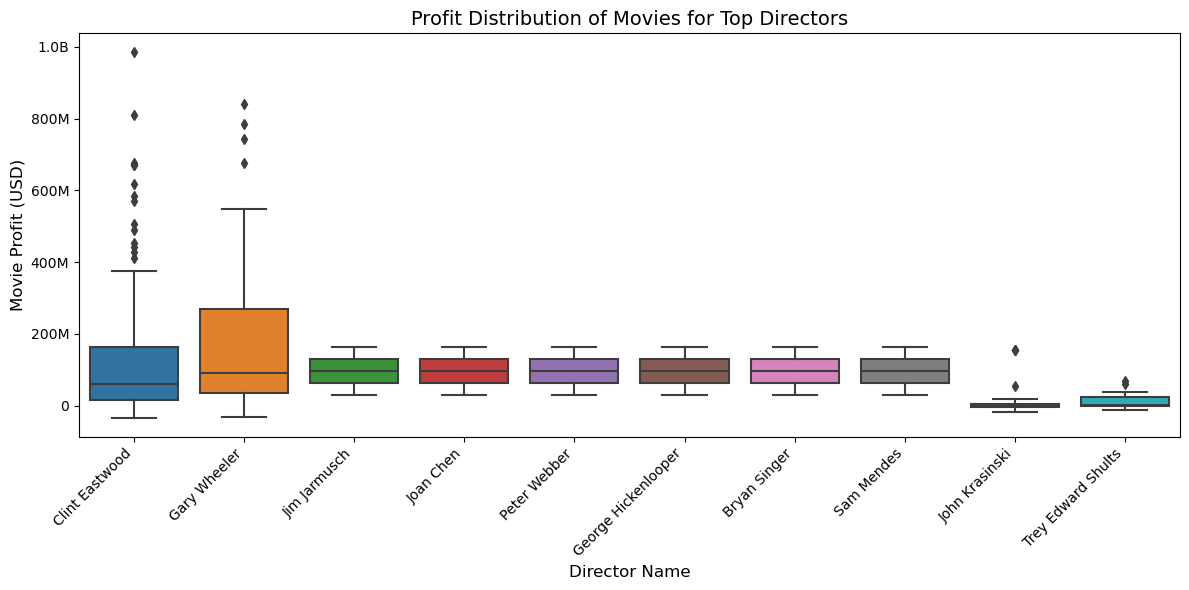

In [25]:
# Filter data for Top 10 Directors
top_directors_list = top_10_directors['director'].tolist()
filtered_df = merged_movie_info[merged_movie_info['director'].isin(top_directors_list)]

# Create boxplot (shows distribution/risk of profits per director) 
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='director', y='profit', data=filtered_df)

# Apply formatter for billions/millions
ax.yaxis.set_major_formatter(billion_formatter)  

# Labels and formatting 
plt.title('Profit Distribution of Movies for Top Directors', fontsize=14)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Movie Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


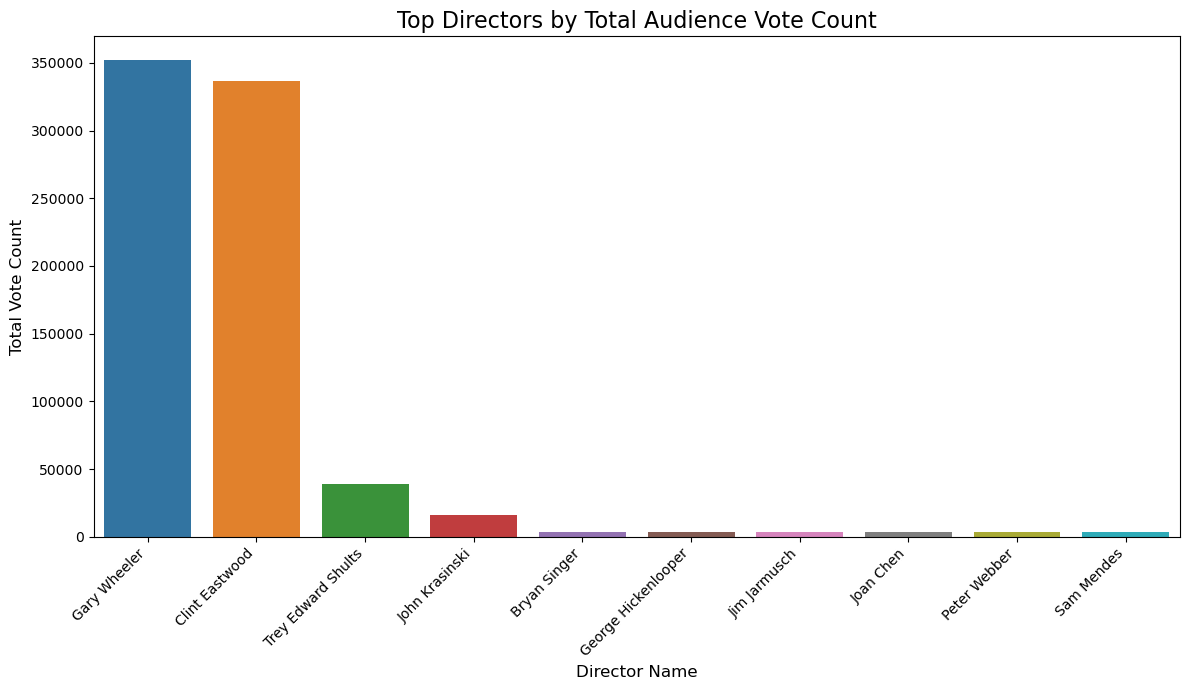

In [26]:
# Group by director and sum the total vote count and sort
director_total_votes = merged_movie_info.groupby('director')['vote_count'].sum().sort_values(ascending=False).reset_index()
director_total_votes.columns = ['Director Name', 'Total Vote Count']

# Select the top directors
top_directors_votes = director_total_votes.head(10)

# Bar Chart for Top Directors by Total Vote Count
plt.figure(figsize=(12, 7))

sns.barplot(x='Director Name', y='Total Vote Count', data=top_directors_votes)

plt.title('Top Directors by Total Audience Vote Count', fontsize=16)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Total Vote Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


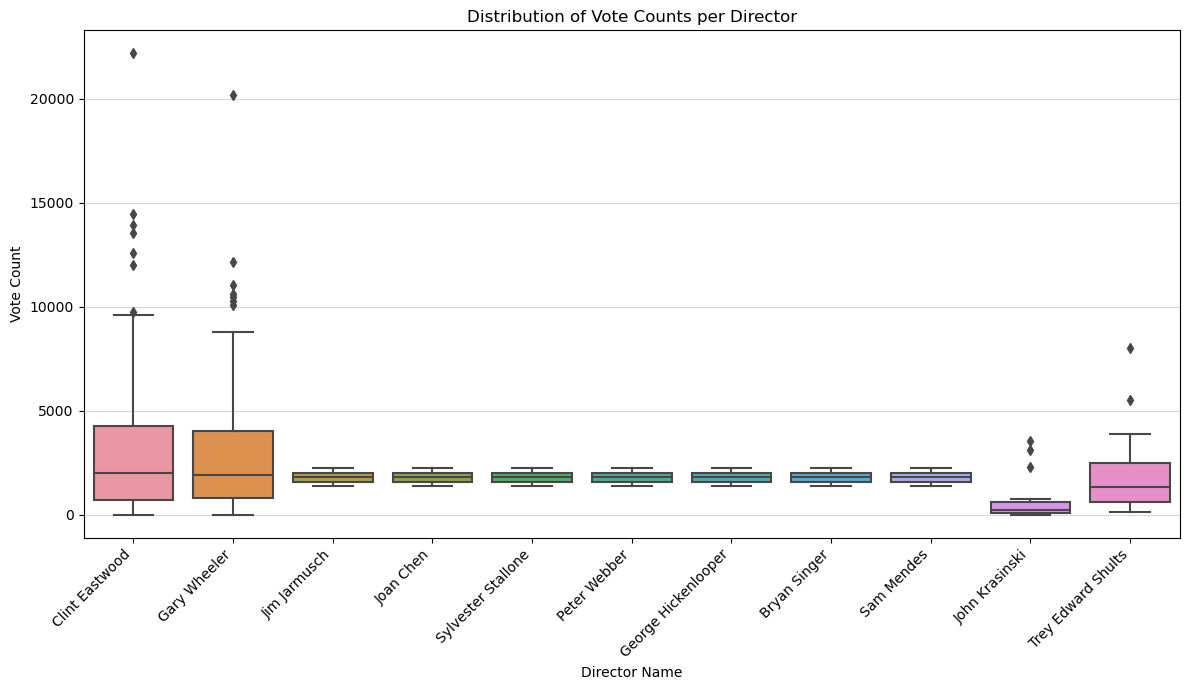

In [27]:
# Boxplot on distribution of vote counts per director

plt.figure(figsize=(12, 7))

sns.boxplot(x='director', y='vote_count', data=merged_movie_info)

plt.title('Distribution of Vote Counts per Director')
plt.xlabel('Director Name')
plt.ylabel('Vote Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()


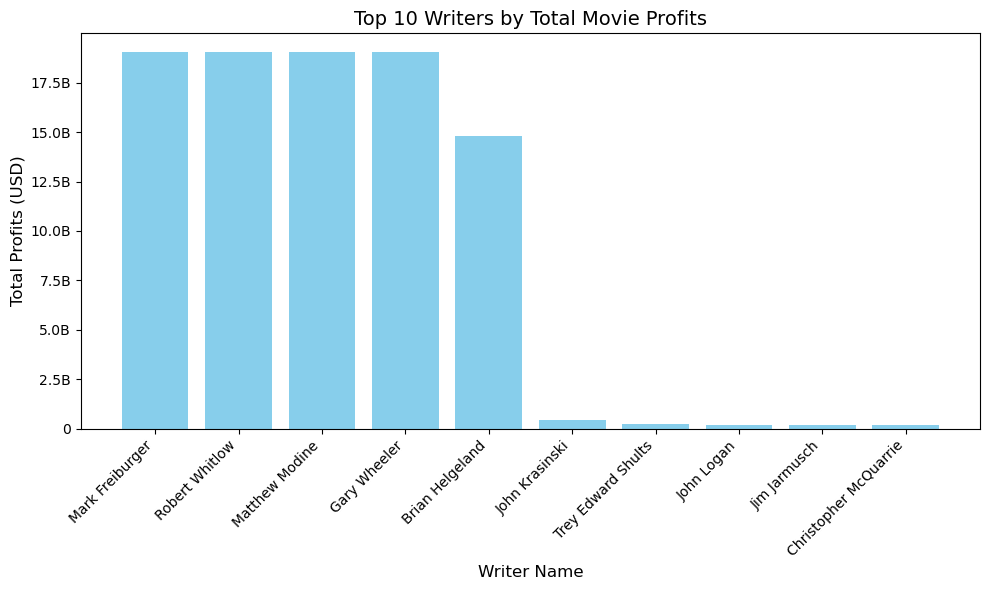

In [28]:
# Distribution of Top Writers by Total Movie Profits 
# Split the combined writer names into individual rows
writers_split = merged_movie_info.assign(
    writer=merged_movie_info['writer'].str.split('|')
).explode('writer')

# Clean up whitespace or missing entries
writers_split['writer'] = writers_split['writer'].str.strip()
writers_split = writers_split.dropna(subset=['writer'])

writer_profit = (
    writers_split.groupby('writer')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Create bar plot
plt.figure(figsize=(10,6))
ax = plt.bar(writer_profit['writer'], writer_profit['profit'], color='skyblue')

# Apply billions/millions formatter 
plt.gca().yaxis.set_major_formatter(billion_formatter)  

# Labels and formatting 
plt.title('Top 10 Writers by Total Movie Profits', fontsize=14)
plt.xlabel('Writer Name', fontsize=12)
plt.ylabel('Total Profits (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


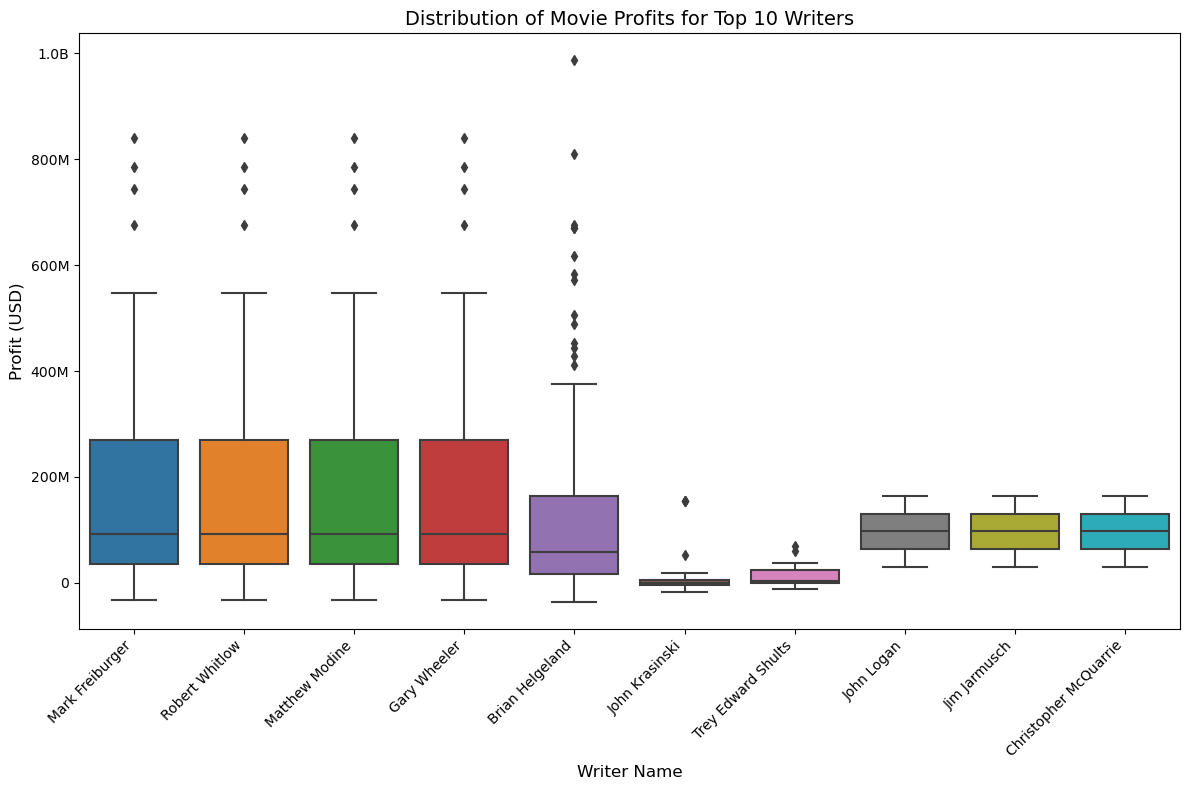

In [29]:
# Check Top 10 Writers 
top_10_writers = (
    writers_split.groupby('writer')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Include only movies from the Top 10 Writers
top_writers_data = writers_split[writers_split['writer'].isin(top_10_writers)]

# Create the boxplot 
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='writer', y='profit', data=top_writers_data, order=top_10_writers)

# Apply billions/millions formatter
ax.yaxis.set_major_formatter(billion_formatter) 

#  Labels and formatting 
plt.title('Distribution of Movie Profits for Top 10 Writers', fontsize=14)
plt.xlabel('Writer Name', fontsize=12)
plt.ylabel('Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


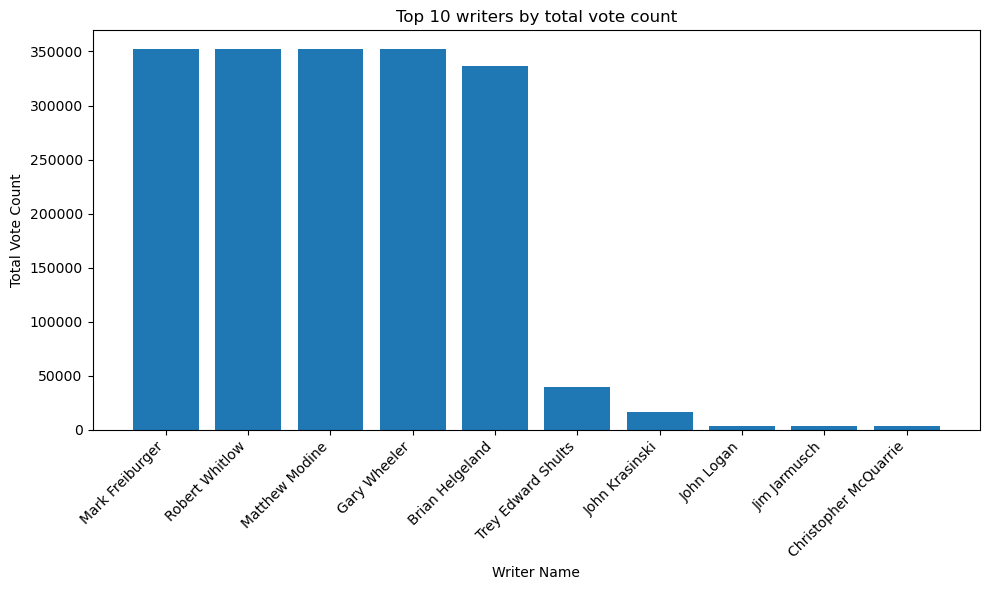

In [30]:
# writer vs vote counts
writer_votes = (
    writers_split.groupby('writer')['vote_count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()

)
# plot
plt.figure(figsize=(10,6))
plt.bar(writer_votes['writer'],writer_votes['vote_count'])
plt.title('Top 10 writers by total vote count')
plt.xlabel('Writer Name')
plt.ylabel('Total Vote Count')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

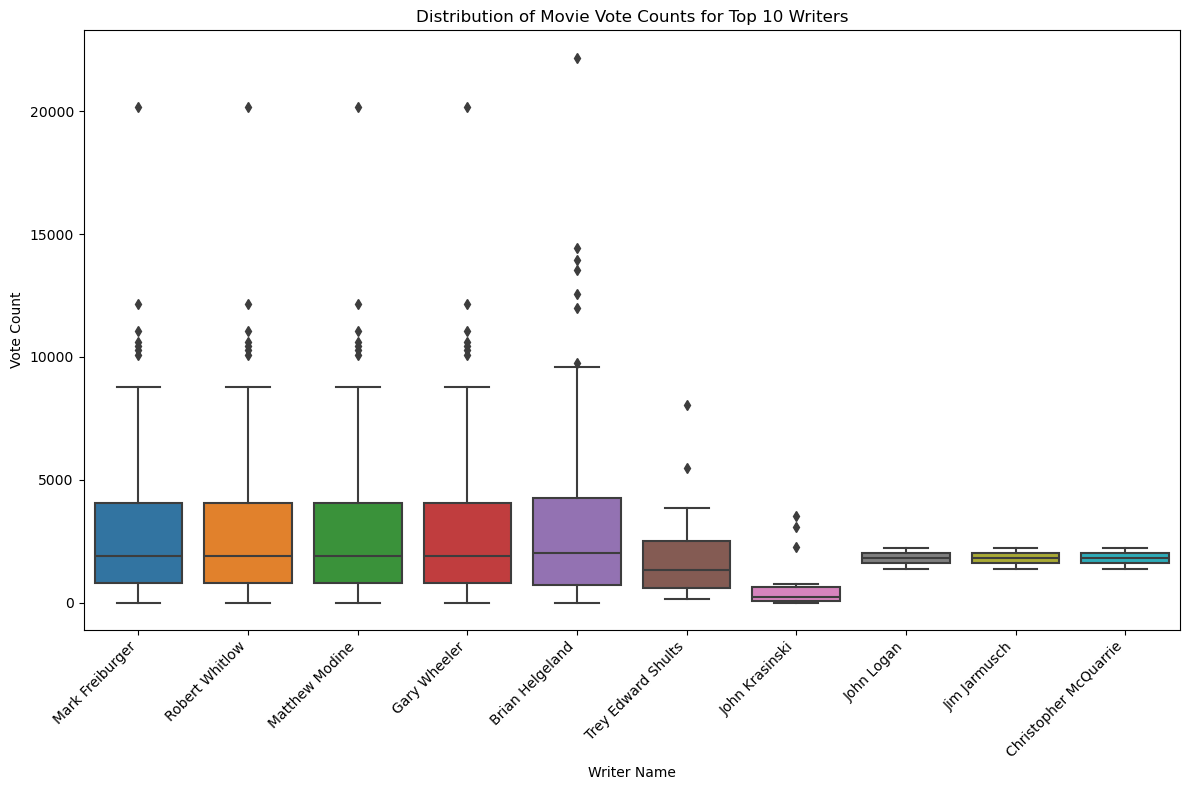

In [31]:
# create notebook
top_10_writers_by_votes = (writers_split.groupby('writer')['vote_count']
                           .sum()
                           .sort_values(ascending=False)
                           .head(10)
                           .index.tolist()
                          )

# Include only movies from the top 10 writers
# This provides the distribution of individual vote counts for the boxplot
top_writers_vote_data = writers_split[writers_split['writer'].isin(top_10_writers_by_votes)]

# Create the boxplot
plt.figure(figsize=(12, 8))
# Use 'sns.boxplot' with 'order' to display the writers in descending order of total votes
sns.boxplot(x='writer', y='vote_count', data=top_writers_vote_data, order=top_10_writers_by_votes)
plt.title('Distribution of Movie Vote Counts for Top 10 Writers')
plt.xlabel('Writer Name')
plt.ylabel('Vote Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **SECTION 5: MOVIE GENRE ANALYSIS BY RATINGS AND PROFITS**
This section shows data prepation and Analysis to establish which **genres have the highest ratings** &  to assess which **genres generate the highest gross revenue and profit** to give our stakeholders an idea on which genres they can focus on when they start creating movies.


In [32]:
#  check for null values in the dataset
df.isna().sum()

movie_titles                1
genres                    146
original_language         157
release_date                1
studio                  44280
production_budget           1
domestic_gross          44279
foreign_gross           44475
worldwide_gross         44279
revenue                     1
runtime                   394
popularity                146
production_companies      146
production_countries      146
vote_average              146
vote_count                146
dtype: int64

In [33]:
# Since revenue is the same as gross we will drop the domestic, 
# foreign and worldwide gross columns since they have alot of 
# missing values and the revenue column has less missing vvalues
# Drop all the columns not needed in this analysis.
columns_to_drop = [
    'domestic_gross',
    'foreign_gross',
    'worldwide_gross',
    'studio',
    'original_language',
]
df = df.drop(columns=columns_to_drop)

In [34]:
# Convert all values to string, then remove $ and comma, and finally convert to numeric
def clean_currency_column(series):
    cleaned_series = series.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    return pd.to_numeric(cleaned_series, errors='coerce')


# Parse JSON-like string in the 'genres' column
def extract_genre_names(genres_str):
    if pd.isna(genres_str) or genres_str in ('[]', ''):
        return []
    try:
        # Use simple string replacement to fix single quotes to double quotes for valid JSON
        genres_str_fixed = genres_str.replace("'", '"')
        genres_list = json.loads(genres_str_fixed)
        return [g['name'] for g in genres_list]
    except (TypeError, json.JSONDecodeError):
        return []

In [35]:
df['revenue'] = clean_currency_column(df['revenue']) # Worldwide revenue
df['production_budget'] = clean_currency_column(df['production_budget']) # Production budget
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce') # Ratings


# Calculate Profit
df['profit'] = df['revenue'] - df['production_budget']

# Drop rows where key financial data is missing or zero (not reliable for profit/revenue analysis)
df.dropna(subset=['revenue', 'production_budget', 'profit', 'vote_average'], inplace=True)
df = df[(df['revenue'] > 1e4) & (df['production_budget'] > 1e4)] # Filter out near-zero values

# Prepare Genres (Exploding the DataFrame)
df['Genres'] = df['genres'].apply(extract_genre_names)
# Filter out movies with no valid genre
df_genre = df[df['Genres'].apply(lambda x: len(x) > 0)].copy()
# Explode the DataFrame to have one row per movie-genre combination
df_exploded = df_genre.explode('Genres')

In [36]:
# Season function so as to work with the seasons instead of months 
df_exploded['release_date'] = pd.to_datetime(df_exploded['release_date'], errors='coerce')
df_exploded.dropna(subset=['release_date'], inplace=True) # drop null

def get_season(month):
    """Maps month number to a cinematic release season."""
    if month in [12, 1, 2]: # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]: # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]: # June, July, August
        return 'Summer'
    else: # September, October, November
        return 'Fall'

df_exploded['Season'] = df_exploded['release_date'].dt.month.apply(get_season)

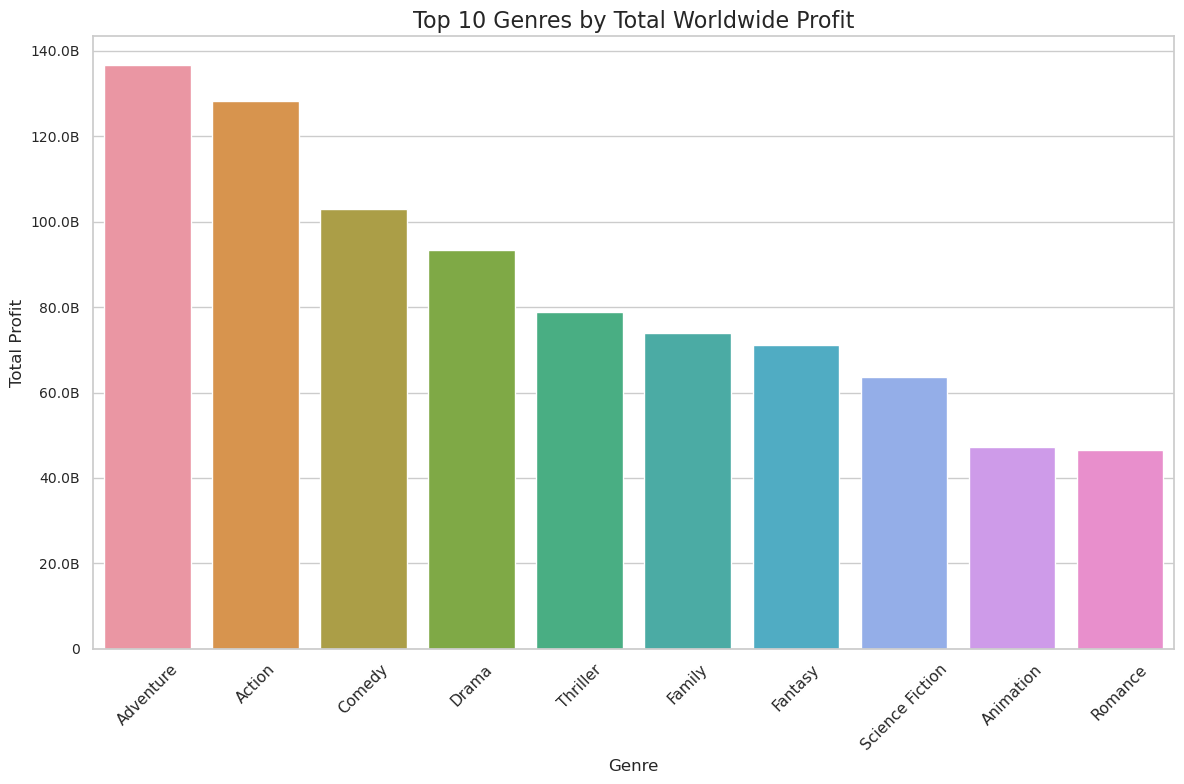

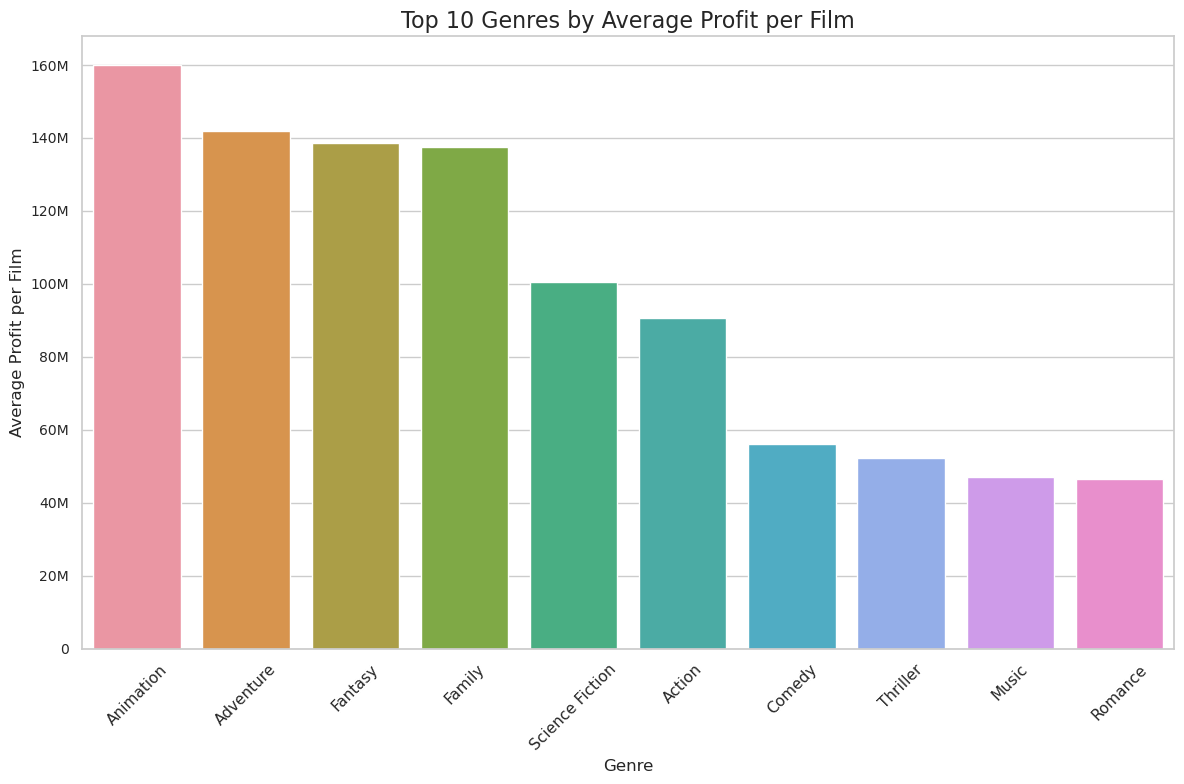

In [37]:
sns.set_theme(style="whitegrid") # so as to have a standard theme in the plots

# 1. Genre vs Profit (Total and Average) 
# Total Profit
genre_total_profit = df_exploded.groupby('Genres')['profit'].sum().sort_values(ascending=False).head(10)

# Average Profit
genre_avg_profit = df_exploded.groupby('Genres')['profit'].mean().sort_values(ascending=False).head(10)

# Plot1. Total Profit
plt.figure(figsize=(12,8))
sns.set_palette("crest")
sns.barplot(x=genre_total_profit.index, y=genre_total_profit.values)
plt.title('Top 10 Genres by Total Worldwide Profit', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Total Profit')
plt.gca().yaxis.set_major_formatter(billion_formatter)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('images/genre_total_profit.png')
plt.show()

# Plot 2: Average Profit
plt.figure(figsize=(12,8))
sns.set_palette("crest")
sns.barplot(x=genre_avg_profit.index, y=genre_avg_profit.values)
plt.title('Top 10 Genres by Average Profit per Film', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average Profit per Film')
plt.gca().yaxis.set_major_formatter(million_formatter)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig('images/genre_avg_profit.png')
plt.show()

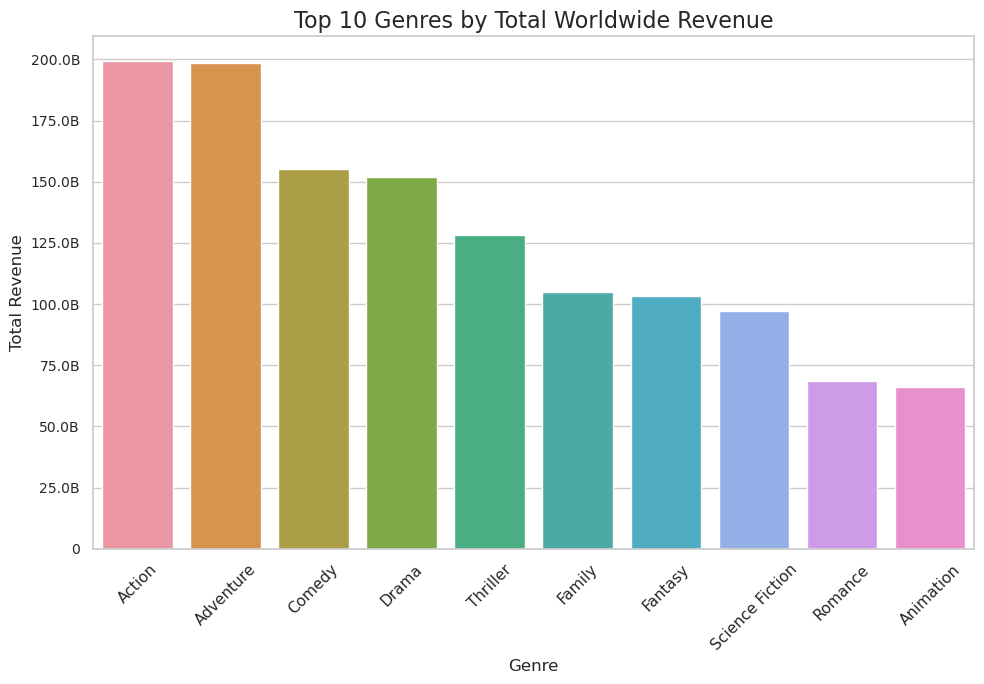

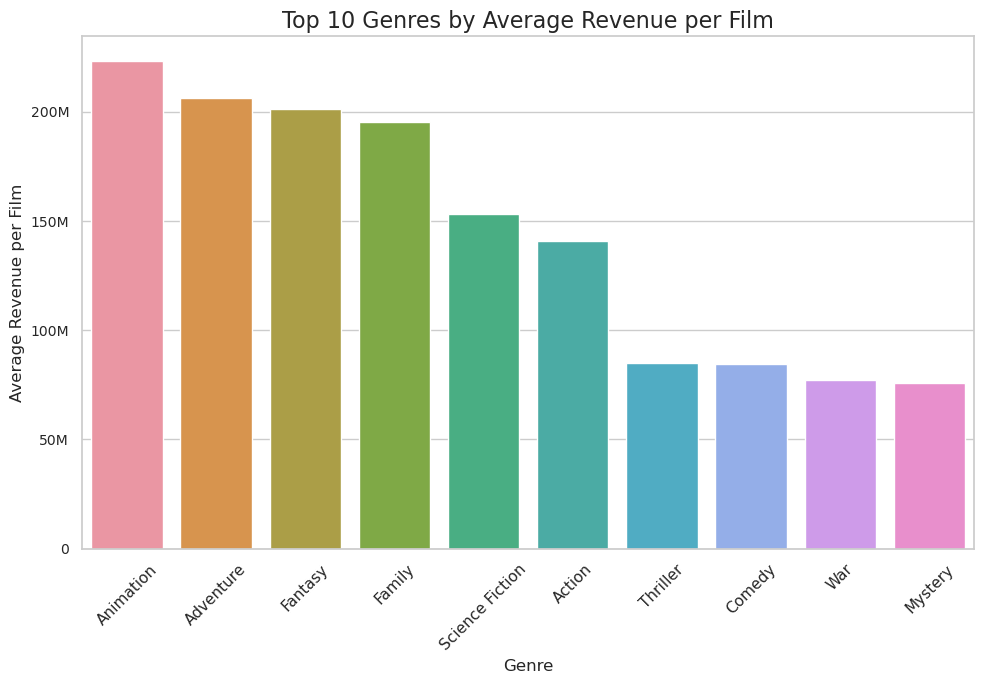

In [38]:
# 2 Genre vs Revenue (Total and Average)

# Total Revenue
genre_total_revenue = df_exploded.groupby('Genres')['revenue'].sum().sort_values(ascending=False).head(10)

# Average Revenue
# Re-calculate average on unique movies per genre to avoid skewing the average
# (Although df_exploded.groupby().mean() is statistically okay, this is conceptually cleaner)
unique_titles = df_genre.explode('Genres')
genre_avg_revenue = unique_titles.groupby('Genres')['revenue'].mean().sort_values(ascending=False).head(10)


# Plot 1: Total Revenue
plt.figure(figsize=(10,7))
sns.set_palette("crest")
sns.barplot(x=genre_total_revenue.index, y=genre_total_revenue.values)
plt.title('Top 10 Genres by Total Worldwide Revenue', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(billion_formatter)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig('images/genre_vs_total_revenue.png')
plt.show()

 # Plot 2: Average Revenue
plt.figure(figsize=(10,7))
sns.set_palette("crest")
sns.barplot(x=genre_avg_revenue.index, y=genre_avg_revenue.values)
plt.title('Top 10 Genres by Average Revenue per Film', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average Revenue per Film')
plt.gca().yaxis.set_major_formatter(million_formatter)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig('images/genre_vs_revenue_avg.png')
plt.show()

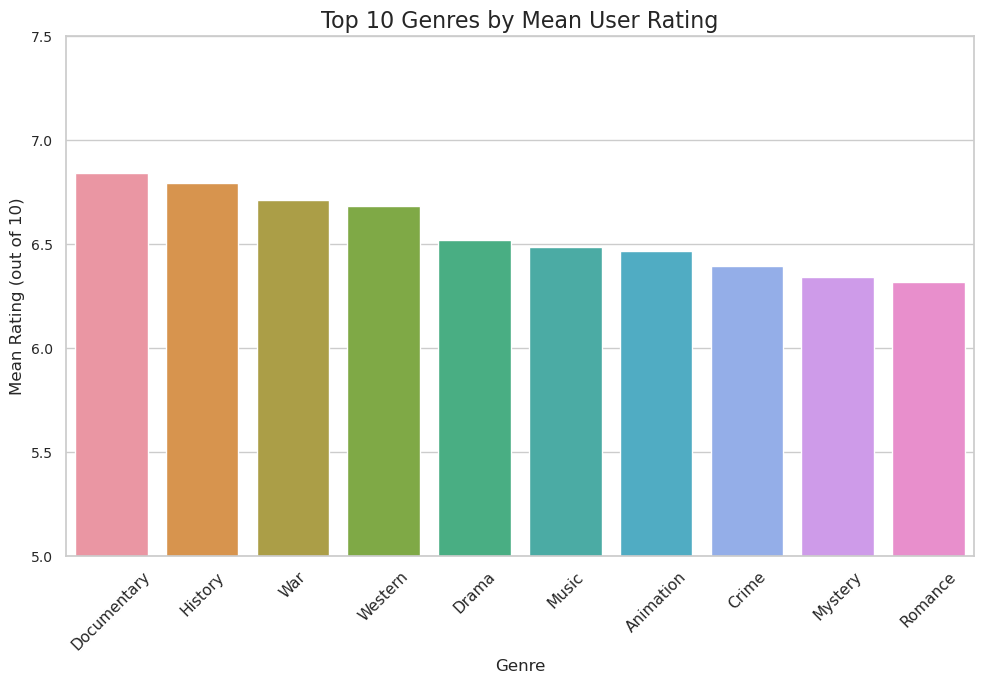

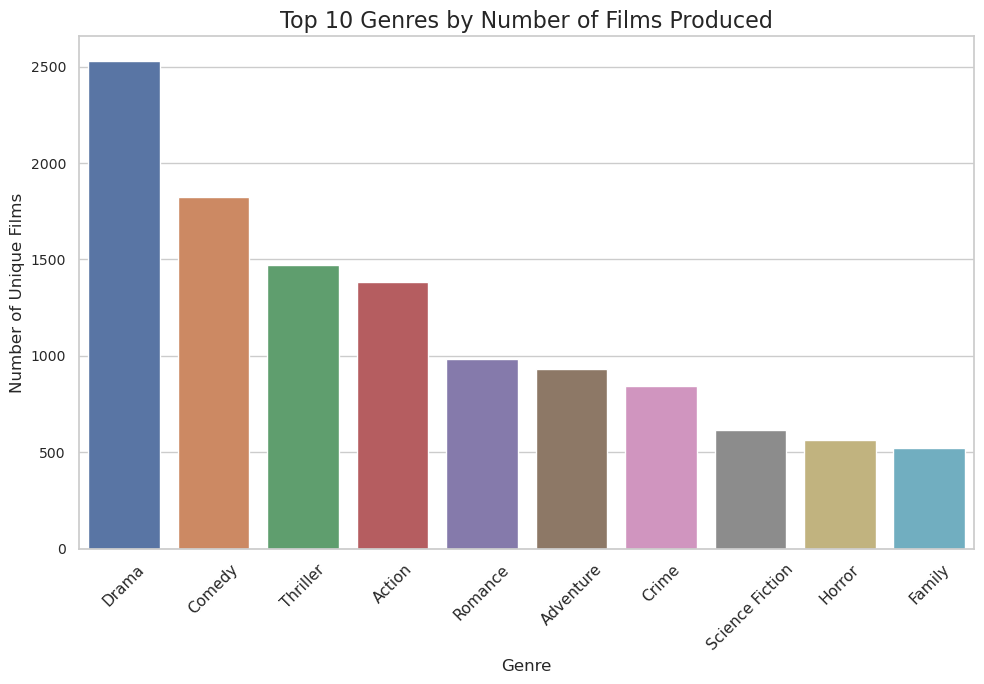

In [39]:
# 3 Genre vs Ratings (Mean Rating and Movie Count) 

# Mean Rating
genre_mean_rating = df_exploded.groupby('Genres')['vote_average'].mean().sort_values(ascending=False).head(10)

# Movie Count
genre_count = df_exploded.groupby('Genres')['movie_titles'].nunique().sort_values(ascending=False).head(10)

# Plot 1: Mean Rating
plt.figure(figsize=(10, 7))
sns.set_palette("flare")
sns.barplot(x=genre_mean_rating.index, y=genre_mean_rating.values)
plt.title('Top 10 Genres by Mean User Rating', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Mean Rating (out of 10)')
plt.xticks(rotation=45)
plt.ylim(5, 7.5)  
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig('images/genre_vs_ratings_count.png')
plt.show()

    # Plot 2: Movie Count
plt.figure(figsize=(10, 7))
sns.set_palette("deep")
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.title('Top 10 Genres by Number of Films Produced', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Number of Unique Films')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
# plt.savefig('images/genre_vs_movie_count.png')
plt.show()

## **SECTION 6: MOVIE PRODUCTION BUDGET VS. WORLDWIDE REVENUE**
The scatter plot below illustrates the relationship between a movie’s production budget and its worldwide revenue.The plot shows a positive trend higher production budgets generally lead to higher worldwide revenues. However, the spread of points around the break-even line indicates that bigger budgets don’t always guarantee profits, as some expensive films still underperform.

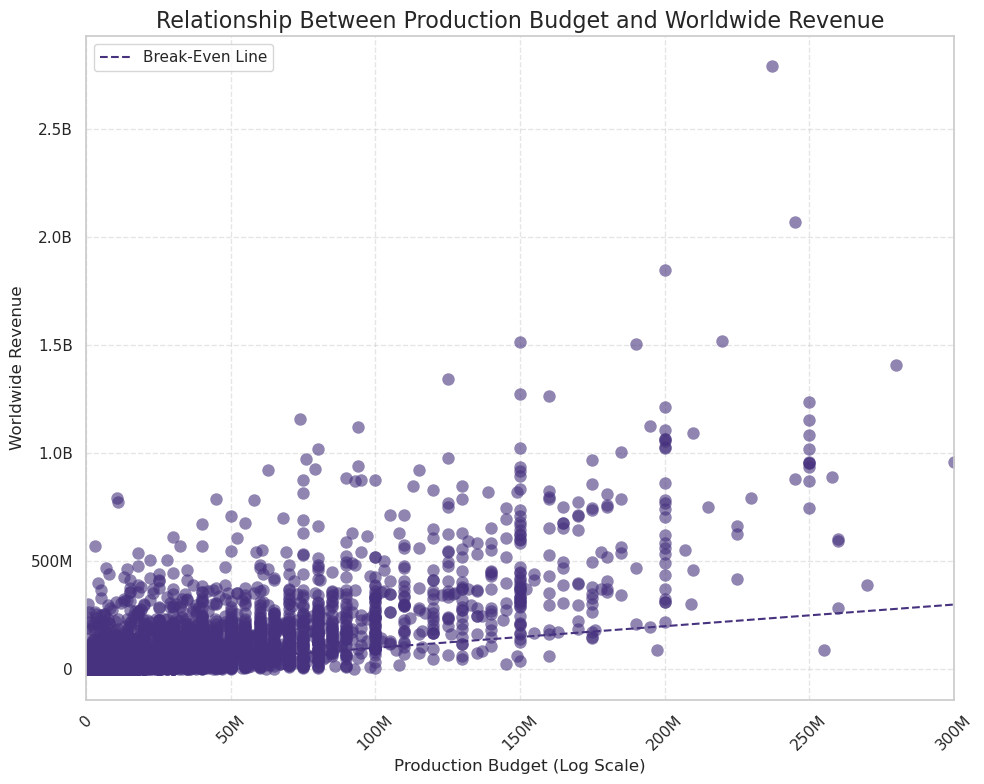

In [40]:
# 4 Budget vs Revenue 
df_plot = df.copy()

plt.figure(figsize=(10, 8))
sns.set_palette("viridis")
sns.scatterplot(
    x='production_budget',
    y='revenue',
    data=df_plot,
    alpha=0.6,
    s=80,
    linewidth=0
    )

# Break-even line
max_value = max(df_plot['production_budget'].max(), df_plot['revenue'].max())
plt.plot([1, max_value], [1, max_value], linestyle='--', label='Break-Even Line')

plt.title('Relationship Between Production Budget and Worldwide Revenue', fontsize=16)
plt.xlabel('Production Budget (Log Scale)')
plt.ylabel('Worldwide Revenue')

# Apply custom formatters
plt.gca().xaxis.set_major_formatter(billion_formatter)
plt.gca().yaxis.set_major_formatter(billion_formatter)
plt.tick_params(axis='x', rotation=45)

plt.xlim(0, 300_000_000)  # Show only budgets ≤ $300M
    
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
#plt.savefig('images/budget_vs_revenue.png')
plt.show()

## **SECTION 7: RATINGS VS. PROFITABILITY BY BUDGET CATEGORY**
The chart below shows that movies with higher audience ratings generally earn higher profits, especially in the high and blockbuster budget categories. Lower-budget films tend to cluster around smaller profits, while larger-budget films show greater variation ndicating that bigger budgets increase both potential reward and financial risk.

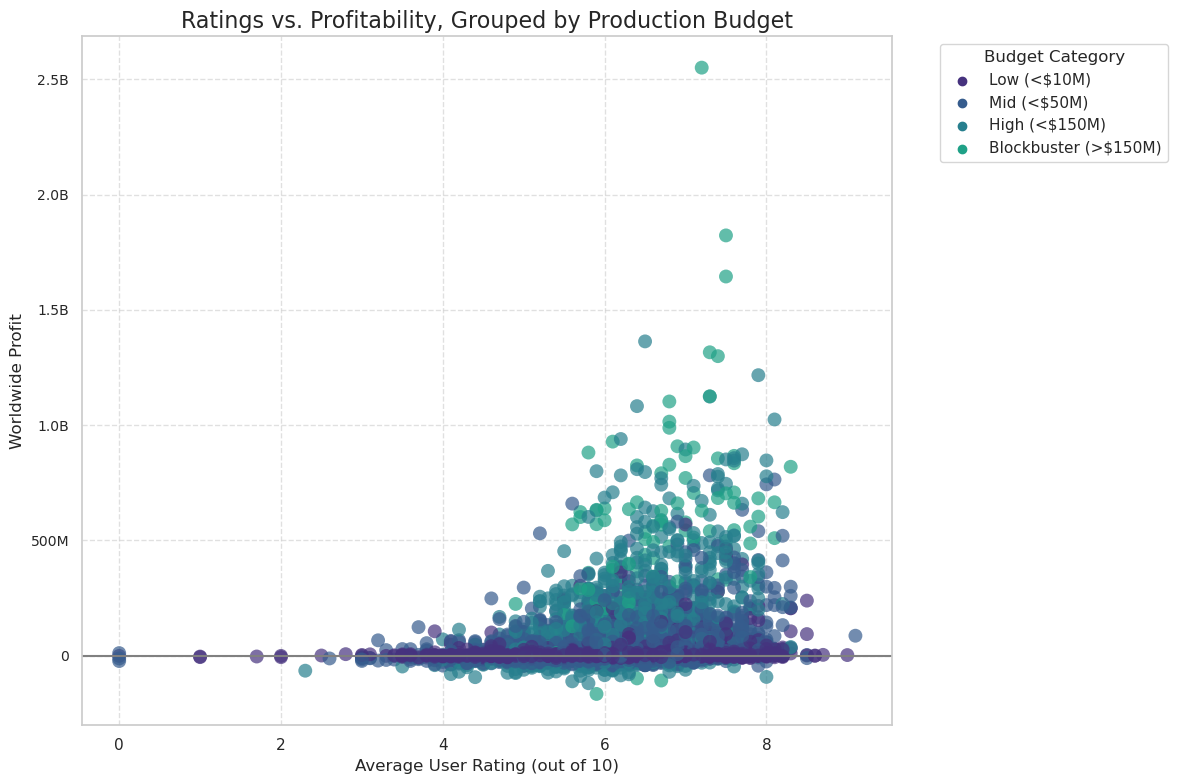

In [41]:
# 5 Ratings vs Profits ( Budget as Hue) 

df_plot = df.copy()

# Create a categorical budget size column for color coding
df_plot['Budget_Category'] = pd.cut(
    df_plot['production_budget'],
    bins=[-np.inf, 1e7, 5e7, 1.5e8, np.inf],
    labels=['Low (<$10M)', 'Mid (<$50M)', 'High (<$150M)', 'Blockbuster (>$150M)']
    )
# Scatter plot with Rating on X, Profit on Y, and Budget Category as Hue
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")
sns.scatterplot(
    x='vote_average',
    y='profit',
    hue='Budget_Category',
    data=df_plot,
    alpha=0.7,
    s=100,
    linewidth=0,
    hue_order=['Low (<$10M)', 'Mid (<$50M)', 'High (<$150M)', 'Blockbuster (>$150M)']
)

# Draw a line at Profit = 0
plt.axhline(0, color='gray', linestyle='-')

plt.title('Ratings vs. Profitability, Grouped by Production Budget', fontsize=16)
plt.xlabel('Average User Rating (out of 10)')
plt.ylabel('Worldwide Profit')

# Apply custom formatter to Y-axis (Profit)
plt.gca().yaxis.set_major_formatter(billion_formatter)
plt.tick_params(axis='y', labelsize=10)

plt.legend(title='Budget Category',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
#plt.savefig('images/ratings_vs_profits_budget.png', dpi=300)
plt.show()


## **SECTION 8: PROFITABILITY BY MOVIE RELEASE SEASON**
Movies released in summer and spring tend to achieve the highest profits, likely due to school holidays and major blockbuster releases. In contrast, fall and winter films show lower average profits, suggesting that release timing plays a key role in maximizing box office returns.

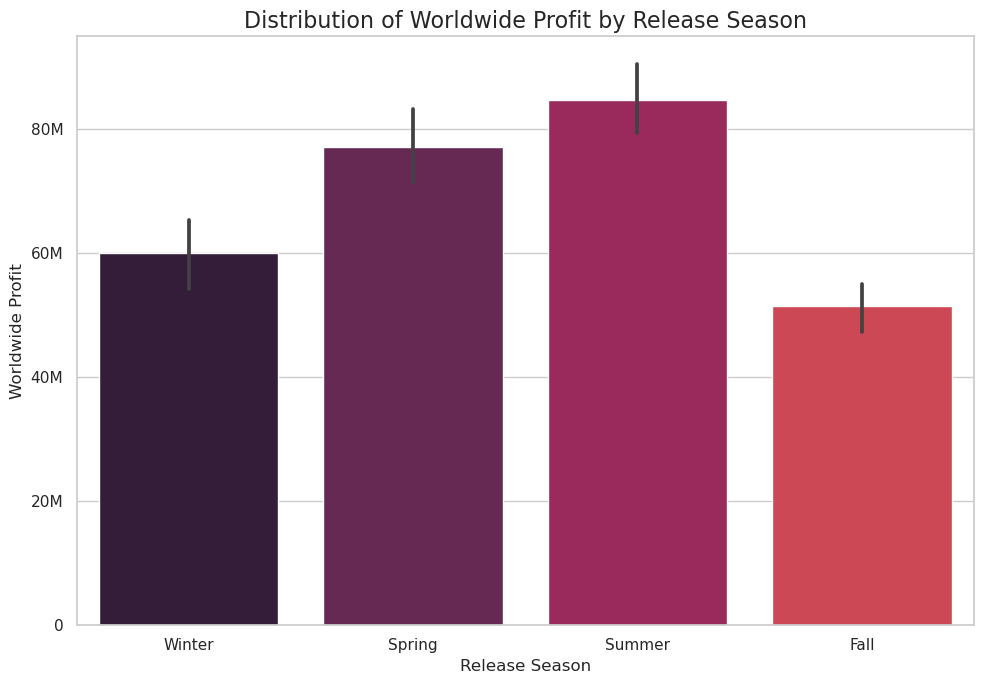

In [42]:
# 6 Seasons vs Profits

season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(10, 7))
sns.set_palette("rocket")
sns.barplot(
        x='Season',
        y='profit',
        data=df_exploded,
        order=season_order,
    )

plt.title('Distribution of Worldwide Profit by Release Season', fontsize=16)
plt.xlabel('Release Season')
plt.ylabel('Worldwide Profit')

plt.gca().yaxis.set_major_formatter(billion_formatter)

plt.tight_layout()
#plt.savefig('images/seasons_vs_profits.png')
plt.show()

## **SECTION 9: CONCLUSIONS AND RECOMMENDATIONS**
### **CONCLUSIONS**
1. **Movie length vs audience ratings**: The longer movies tend to be rated more favorably
2. **Directors and writers Vs Movie Performance**: The directors generating high revenue to be considered for better returns. 
3. **Genres effects on ratings, gross revenue and profit**: Genres with high total profit are better options for studios aiming for consistent returns
4. **Movie realese season vs profit** : Studios to prioritize Summer and Spring for major release to maximize revenue

### **RECOMMENDATIONS**
1. **Movie length vs audience ratings**: Content creators to consider longer movie run times, they probably give an allowance for deeper story telling.

2. **Directors and writers Vs Movie Performance**: The studio to consider prioritizing directors who have released movies that generated high revenues e.g Clint Eastwood and Gary Wheeeler

3. **Genres effects on ratings, gross revenue and profit**: The studios to consider prioritizing genres with high total profit for consistent returns

4. **Movie realese season vs profit** : Seasonality should be considered in release planning and marketing strategies.